In [7]:
import numpy as np
from sklearn.manifold import TSNE

import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

# X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
# X_embedded = TSNE(n_components=2).fit_transform(X)
# X_embedded.shape

In [2]:
X_embedded

array([[ 260.02618 , -108.671844],
       [   9.432345,  -67.3498  ],
       [ 114.06963 , -213.2999  ],
       [ 155.38904 ,   37.278255]], dtype=float32)

In [11]:
def tsne_plot(feats, labels):
    "Creates and TSNE model and plots it"
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(feats)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [10]:
entity_feats = np.load('../data/MIMIC_KG_RotatE_entity.npy')
entity_feats.shape

(124, 400)

In [18]:
# labels = [i for i in range(124)]
entity_path = '../data/entities.tsv'
with open(entity_path) as f:
    entity2id = {}
    for line in f:
        eid, entity = line.strip().split('\t')
        entity2id[int(eid)] = entity
labels = [entity2id[i] for i in range(124)]

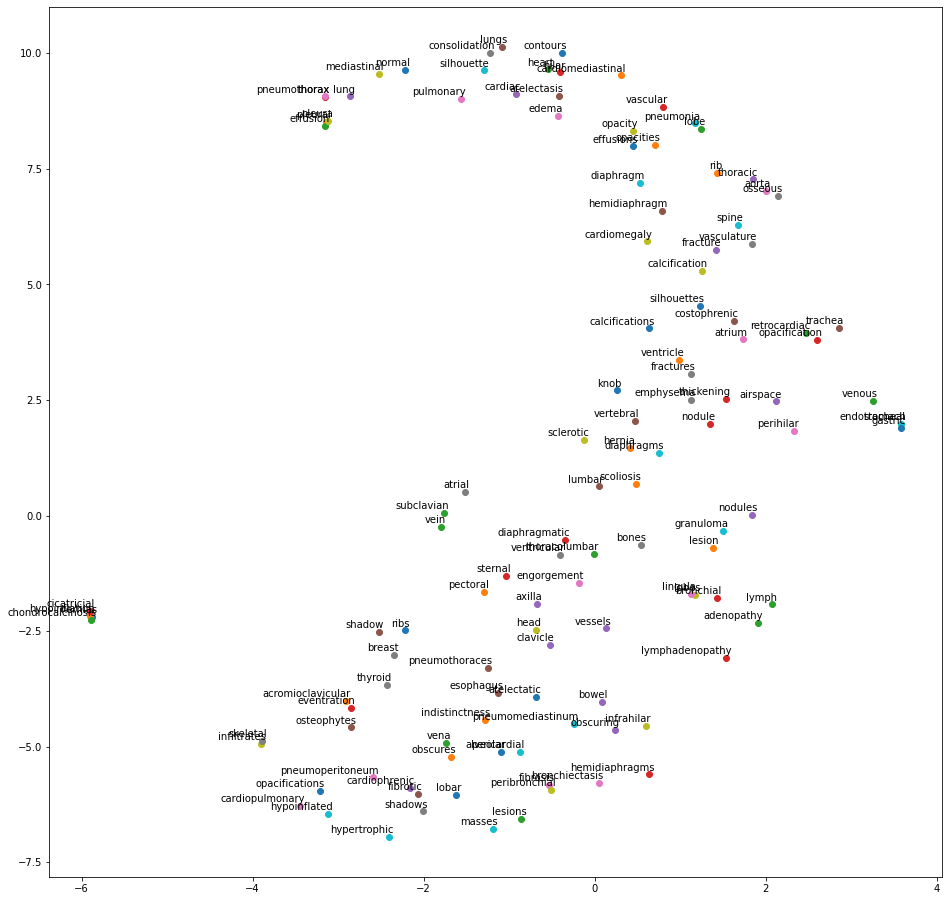

In [20]:
tsne_plot(entity_feats, labels)